In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
df = pd.read_csv("data.csv")
df

Feature 1  Feature 2  Feature 3  Target
0        230.1       37.8       69.2    22.1
1         44.5       39.3       45.1    10.4
2         17.2       45.9       69.3     9.3
3        151.5       41.3       58.5    18.5
4        180.8       10.8       58.4    12.9
..         ...        ...        ...     ...
195       38.2        3.7       13.8     7.6
196       94.2        4.9        8.1     9.7
197      177.0        9.3        6.4    12.8
198      283.6       42.0       66.2    25.5
199      232.1        8.6        8.7    13.4

[200 rows x 4 columns]

In [4]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [5]:
target_col = "Target"


In [6]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [7]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels

In [8]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [9]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [10]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.88e-69
Time:                        18:34:14   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [11]:
#prediction on x test data to get y_pred
X_test = sm.add_constant(X_test)

In [12]:
y_pred = results.predict(X_test)


In [13]:
#how good my model is - how much of deviations is occuring is occuring bw predications and actual value that u have never shown to the model
residual = y_test - y_pred

# No Multicolinearity


In [14]:
#little to no multicolinearity
#variance inflation factor vif -> you can find out if their is multicolinearity in dataset or not
#value>10 -> heavy multicolinearity
#value<5 -> little relationship feature hold with other feature
#value>5 -> assumption goes for a toss
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T
#all 3 are independent and week vif scores assumption hold true.

Feature 1  Feature 2  Feature 3
vif   2.697679   3.473818   3.162643

# Normailty of Residual

<AxesSubplot:ylabel='Density'>

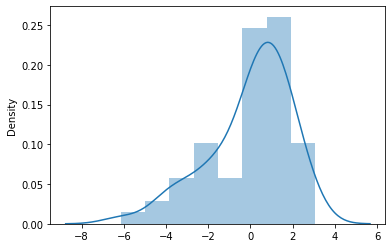

In [15]:
#plot is near normal distriution, center around 0
sns.distplot(residual)

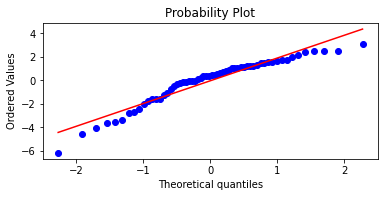

In [16]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [17]:
np.mean(residual)
# should be near 0 -> it's safe to say it's near normal

-0.03848895253439791

# Homoscedasticity

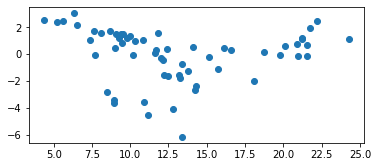

In [18]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)
#no pattern based on the residual and prediction plot. most of values centered around 0

# No autocorrelation of residuals

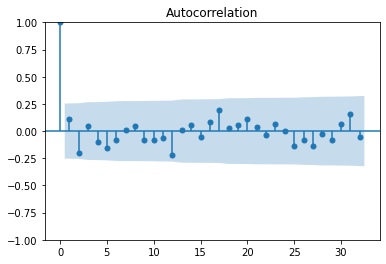

In [19]:
acf = smt.graphics.plot_acf(residual, lags=32 , alpha=0.05)
acf.show()
#residual with itself will have heavy correlation which we can't avoid, other none of value cross blue border.